In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
pd.set_option("mode.chained_assignment", None)

# Regression Analysis: Seasonal Effects with Sklearn Linear Regression
In this notebook, you will build a SKLearn linear regression model to predict Yen futures ("settle") returns with *lagged* Yen futures returns. 

In [2]:
# Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration
yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [3]:
# Trim the dataset to begin on January 1st, 1990
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0


# Data Preparation

### Returns

In [4]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
# YOUR CODE HERE!

Settle = yen_futures["Settle"].pct_change()*100
Settle.dropna(inplace=True)

exists = np.inf in Settle
print("Infinity:" + str(exists))
exists = np.NINF in Settle
print("Negative Infinity:" + str(exists))
yen_futures["Return"] = Settle
yen_futures = yen_futures.dropna()

Infinity:False
Negative Infinity:False


### Lagged Returns 

In [5]:
# Create a lagged return using the shift function
# YOUR CODE HERE!
yen_futures["Lagged_Return"] = yen_futures["Return"].shift().dropna()
yen_futures.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return,Lagged_Return
Date,,,,,,,,,,
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153.0,145470.0,-0.410601,0.170931
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397.0,144474.0,-0.369458,-0.410601
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810.0,147471.0,-0.564304,-0.369458
2019-10-14,9259.0,9292.0,9250.5,9261.0,14.0,9265.0,69457.0,153902.0,0.151335,-0.564304
2019-10-15,9264.5,9280.0,9216.5,9220.0,43.5,9221.5,108342.0,151564.0,-0.469509,0.151335


### Train Test Split

In [6]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training
train = yen_futures[:'2017'].dropna()
test = yen_futures['2018':].dropna()

In [7]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
# YOUR CODE HERE!

X_train = pd.DataFrame(train["Lagged_Return"])
X_test = pd.DataFrame(test["Lagged_Return"])
y_train = pd.DataFrame(train["Return"])
y_test = pd.DataFrame(test["Return"])

In [8]:
X_train

,Lagged_Return
Date,
2014-02-19,-0.427829
2014-02-20,-0.020460
2014-02-21,0.020465
2014-02-24,-0.204604
2014-02-25,0.020502
...,...
2017-12-22,0.084621
2017-12-26,0.118370
2017-12-27,0.118230


# Linear Regression Model

In [9]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
# YOUR CODE HERE!

reg = LinearRegression()
reg.fit(X_train, y_train)
reg.get_params(deep=True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

# Make predictions using the Testing Data

Note: We want to evaluate the model using data that it has never seen before, in this case: X_test.

In [10]:
# Make a prediction of "y" values using just the test dataset
# YOUR CODE HERE!

predictions = reg.predict(X_test)
predictions

array([[-0.00862124],
       [-0.00888545],
       [-0.00692339],
       [-0.00702354],
       [-0.00650945],
       [-0.00802706],
       [-0.00921926],
       [-0.01203973],
       [-0.00865099],
       [-0.00786138],
       [-0.01026426],
       [-0.00513322],
       [-0.00812407],
       [-0.00909274],
       [-0.00647317],
       [-0.01000139],
       [-0.01203513],
       [-0.00653118],
       [-0.01028917],
       [-0.00689127],
       [-0.0083558 ],
       [-0.00667268],
       [-0.00672874],
       [-0.00499329],
       [-0.00966691],
       [-0.00895868],
       [-0.00756199],
       [-0.00953327],
       [-0.0088314 ],
       [-0.00740552],
       [-0.01108511],
       [-0.00987929],
       [-0.01054993],
       [-0.00758792],
       [-0.00450909],
       [-0.0060618 ],
       [-0.01164882],
       [-0.00745109],
       [-0.0071785 ],
       [-0.00608657],
       [-0.01034511],
       [-0.00912245],
       [-0.01020218],
       [-0.0055113 ],
       [-0.00774271],
       [-0

In [11]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
# YOUR CODE HERE!
test_data= y_test
test_data["Predicted"] = predictions
test_data

,Return,Predicted
Date,,
2018-01-02,0.297285,-0.008621
2018-01-03,-0.240479,-0.008885
2018-01-04,-0.213028,-0.006923
2018-01-05,-0.353933,-0.007024
2018-01-08,0.062017,-0.006509
...,...,...
2019-10-09,-0.410601,-0.008424
2019-10-10,-0.369458,-0.006303
2019-10-11,-0.564304,-0.006453


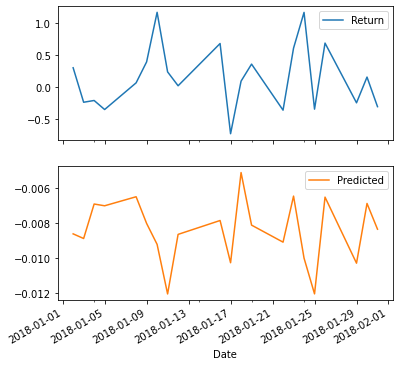

In [12]:
# Plot the first 20 predictions vs the true values
# YOUR CODE HERE!
test_data[0:21].plot(subplots=True, figsize=(6, 6));


# Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (X_test and y_test)

In [13]:
from sklearn.metrics import mean_squared_error
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# YOUR CODE HERE!
mse = mean_squared_error(test_data["Return"],test_data["Predicted"])
# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
# YOUR CODE HERE!

print("Out-of-Sample Root Mean Squared Error (RMSE): " + str(np.sqrt(mse)))

Out-of-Sample Root Mean Squared Error (RMSE): 0.4154832784856737


# In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [14]:
# Construct a dataframe using just the "y" training data:
# YOUR CODE HERE!
y_train_df = pd.DataFrame(y_train)
# Add a column of "in-sample" predictions to that dataframe:  
# YOUR CODE HERE!
y_train_df["insample Predictions"] = reg.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!
mse = mean_squared_error(y_train_df["Return"],y_train_df["insample Predictions"])



# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

print("In-Sample Root Mean Squared Error (RMSE): " + str(np.sqrt(mse)))

In-Sample Root Mean Squared Error (RMSE): 0.5963660785073426


# Conclusions

The models show that the RMSE is similar 0.415 and 0.59 insample respectively showing there is not overfitting of the data. However, given how high the values are, its seems pudent to include more data in the model to provide more predictive power. 